In [1]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize

In [2]:
encoder = nn.Sequential(nn.Linear(1000,50), nn.ReLU(), nn.Linear(50,10))
decoder = nn.Sequential(nn.Linear(10,50), nn.ReLU(), nn.Linear(50,1000))
missing_model = LogisticMissingModel()

In [3]:
model = notMIWAE(encoder, decoder, missing_model, 1024, 10, 1024, 10, device = torch.device('cuda:0'))

In [6]:
x = torch.randn(64, 1000)
x = normalize(x)

s = torch.randint(0, 2, (64, 1000)).float()

In [7]:
from src.datasets import generate_synthetic_dataset

data = generate_synthetic_dataset(N = 10, T = 1000, K = 20, clipping_model="soft", W = 50, thresh = .3)

In [8]:
data[0][0]

tensor([ 0.0000,  0.4431, -0.0000, -0.0000,  0.0000,  0.0000, -0.3279,  0.4592,
        -0.0000, -0.0000, -0.4000,  0.0000,  0.0000, -0.0000, -0.3260,  0.0000,
        -0.0000, -0.3872,  0.4732, -0.0000, -0.0000, -0.4794,  0.0000,  0.0000,
        -0.3658, -0.0000, -0.0000, -0.3116, -0.0000,  0.5029, -0.6143,  0.0000,
        -0.0000,  0.0000, -0.4056, -0.0000, -0.0000, -0.0000, -0.3188, -0.0000,
         0.4271, -0.3848, -0.4794,  0.3576,  0.0000,  0.0000, -0.0000,  0.0000,
        -0.0000, -0.3532,  0.0000, -0.0000, -0.6435, -0.0000,  0.4543, -0.3041,
        -0.0000,  0.4182, -0.0000,  0.0000, -0.4943,  0.7572, -0.0000, -0.3038,
        -0.4086,  0.0000,  0.0000, -0.5196,  0.3966, -0.0000,  0.0000,  0.0000,
         0.4017, -0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
        -0.5240,  0.0000,  0.0000,  0.4265, -0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, -0.3628,  0.0000,  0.0000,  0.0000, -0.3928,
         0.5077,  0.0000, -0.0000,  0.43

In [9]:
from src.datasets import load_dataset
import torch

In [15]:
dataset_dir = "/users/eleves-b/2021/pierre.aguie/not-MIWAE-for-audio-inpainting/data/musicnet"
n_samples = 10000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_train.pt")
torch.save(dataset.s,"s_train.pt")


RuntimeError: Couldn't find appropriate backend to handle uri /users/eleves-b/2021/pierre.aguie/not-MIWAE-for-audio-inpainting/data/musicnet/s_train.pt and format None.

In [ ]:
# dataset_dir = "/mnt/c/Users/atous/Documents/musicnet/musicnet/test_data"
n_samples = 1000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_val.pt")
torch.save(dataset.s,"s_val.pt")


In [20]:
zero_mask = torch.eq(dataset.s, 0)

# Count the number of zeros
num_zeros = zero_mask.sum().item()

NameError: name 'dataset' is not defined

In [5]:
print(num_zeros)

533


In [4]:
import torchaudio
import matplotlib.pyplot as plt
from src.datasets import ClippedDataset

/tmp/ipykernel_841397/3999070242.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load("data/musicnet/x_train.pt")
/tmp/ipykernel_841397/3999070242.py:2: Future

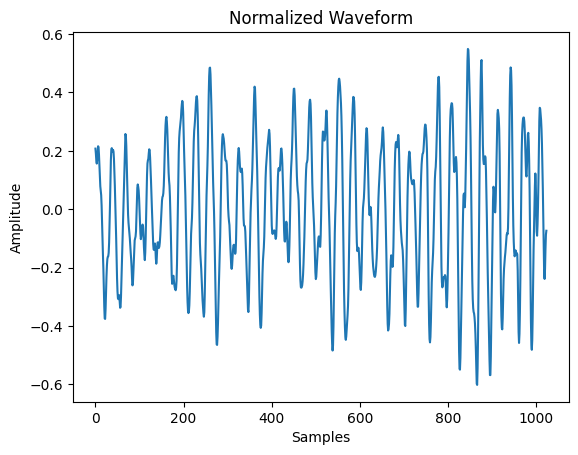

In [5]:
x = torch.load("data/musicnet/x_train.pt")
s = torch.load("data/musicnet/s_train.pt")
dataset = ClippedDataset(x, s)

plt.plot(dataset.x[1000].t().numpy())
plt.title("Normalized Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


plt.show()


In [6]:
for i in range(10000):
    if dataset.s[i].sum() != 1024:
        print(i, dataset.s[i].sum())


8 tensor(1020.)
29 tensor(1023.)
95 tensor(1023.)
103 tensor(1013.)
106 tensor(1009.)
114 tensor(1022.)
120 tensor(1022.)
136 tensor(1011.)
177 tensor(1022.)
179 tensor(1023.)
200 tensor(1008.)
212 tensor(1023.)
227 tensor(1023.)
259 tensor(969.)
267 tensor(1012.)
271 tensor(1013.)
278 tensor(1018.)
294 tensor(1020.)
336 tensor(956.)
337 tensor(949.)
388 tensor(1013.)
416 tensor(1012.)
418 tensor(1023.)
437 tensor(1018.)
442 tensor(1022.)
443 tensor(1021.)
444 tensor(1021.)
481 tensor(1021.)
492 tensor(970.)
506 tensor(1023.)
513 tensor(1022.)
535 tensor(1020.)
536 tensor(1019.)
549 tensor(1020.)
567 tensor(1018.)
572 tensor(1023.)
609 tensor(1023.)
644 tensor(1021.)
648 tensor(1021.)
662 tensor(1000.)
673 tensor(1014.)
674 tensor(1022.)
680 tensor(1022.)
693 tensor(1023.)
705 tensor(990.)
709 tensor(1023.)
731 tensor(1019.)
733 tensor(1016.)
736 tensor(1020.)
751 tensor(1018.)
759 tensor(1015.)
790 tensor(1006.)
796 tensor(1011.)
803 tensor(1023.)
824 tensor(1020.)
827 tensor(1023.)
8

In [7]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize
x_train = torch.load("data/musicnet/x_train.pt", weights_only=True)
s_train = torch.load("data/musicnet/s_train.pt", weights_only=True)
x_val = torch.load("data/musicnet/x_val.pt", weights_only=True)
s_val = torch.load("data/musicnet/s_val.pt", weights_only=True)


In [8]:
from src.datasets import ClippedDataset
device = torch.device("cuda:0")
train_dataset = ClippedDataset(x_train.to(device),s_train.to(device))
val_dataset = ClippedDataset(x_val.to(device),s_val.to(device))
from torch.utils.data import Dataset, DataLoader
from src.models import AudioDecoder,AudioEncoder,notMIWAE


train_loader = DataLoader(train_dataset,64)
val_loader = DataLoader(val_dataset,64)

encoder = AudioEncoder(1024,20).to(device)
decoder = AudioDecoder(1024,20,5).to(device)
encoder.to(device)
missing_model = LogisticMissingModel(fixed_params=True).to(device)
model = notMIWAE(encoder, decoder, missing_model,1024,20,1024,20,device)
model.to(device)
from src.train_test import *
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
train(model,optimizer,train_loader,val_loader,device,100,5,1)

Epoch 1/100: 100%|██████████| 157/157 [00:04<00:00, 38.47batch/s]


Training loss for epoch 0 is -529.3960943525764
Validation loss / Mean Squared Error for epoch 0 is -678.7061138153076/0.00048353191232308745


Epoch 2/100: 100%|██████████| 157/157 [00:03<00:00, 41.63batch/s]


Training loss for epoch 1 is -676.815808727483
Validation loss / Mean Squared Error for epoch 1 is -705.2940349578857/0.000508641533087939


Epoch 3/100: 100%|██████████| 157/157 [00:03<00:00, 41.62batch/s]


Training loss for epoch 2 is -687.9141198419461
Validation loss / Mean Squared Error for epoch 2 is -714.9178447723389/0.0005043775890953839


Epoch 4/100: 100%|██████████| 157/157 [00:03<00:00, 41.65batch/s]


Training loss for epoch 3 is -694.1518438059813
Validation loss / Mean Squared Error for epoch 3 is -734.4324989318848/0.00047891002031974494


Epoch 5/100: 100%|██████████| 157/157 [00:03<00:00, 41.61batch/s]


Training loss for epoch 4 is -699.84829362031
Validation loss / Mean Squared Error for epoch 4 is -742.7980632781982/0.0005173833924345672


Epoch 6/100: 100%|██████████| 157/157 [00:03<00:00, 41.66batch/s]


Training loss for epoch 5 is -699.5618050933643
Validation loss / Mean Squared Error for epoch 5 is -744.2667388916016/0.0005263283383101225


Epoch 7/100: 100%|██████████| 157/157 [00:03<00:00, 41.66batch/s]


Training loss for epoch 6 is -707.8527797042943
Validation loss / Mean Squared Error for epoch 6 is -744.4209728240967/0.0005142553127370775


Epoch 8/100: 100%|██████████| 157/157 [00:03<00:00, 41.68batch/s]


Training loss for epoch 7 is -704.8306620409534
Validation loss / Mean Squared Error for epoch 7 is -749.6298141479492/0.0004979460500180721


Epoch 9/100: 100%|██████████| 157/157 [00:03<00:00, 41.66batch/s]


Training loss for epoch 8 is -711.2050388603453
Validation loss / Mean Squared Error for epoch 8 is -752.7610397338867/0.00051513547077775


Epoch 10/100: 100%|██████████| 157/157 [00:03<00:00, 41.72batch/s]


Training loss for epoch 9 is -712.6234439922746
Validation loss / Mean Squared Error for epoch 9 is -758.2493095397949/0.0005333394510671496


Epoch 11/100: 100%|██████████| 157/157 [00:03<00:00, 41.71batch/s]


Training loss for epoch 10 is -719.5250918637415
Validation loss / Mean Squared Error for epoch 10 is -772.4828834533691/0.000506741227582097


Epoch 12/100: 100%|██████████| 157/157 [00:03<00:00, 41.72batch/s]


Training loss for epoch 11 is -725.3261747906922
Validation loss / Mean Squared Error for epoch 11 is -782.8234100341797/0.00047344795893877745


Epoch 13/100: 100%|██████████| 157/157 [00:03<00:00, 41.71batch/s]


Training loss for epoch 12 is -743.7388882971113
Validation loss / Mean Squared Error for epoch 12 is -792.6224040985107/0.0004904044908471406


Epoch 14/100: 100%|██████████| 157/157 [00:03<00:00, 41.67batch/s]


Training loss for epoch 13 is -757.2440815336386
Validation loss / Mean Squared Error for epoch 13 is -808.7258434295654/0.0004364624619483948


Epoch 15/100: 100%|██████████| 157/157 [00:03<00:00, 41.73batch/s]


Training loss for epoch 14 is -768.0725424213774
Validation loss / Mean Squared Error for epoch 14 is -808.9294986724854/0.0005112629733048379


Epoch 16/100: 100%|██████████| 157/157 [00:03<00:00, 41.73batch/s]


Training loss for epoch 15 is -777.3363066266297
Validation loss / Mean Squared Error for epoch 15 is -826.5381965637207/0.000487200275529176


Epoch 17/100: 100%|██████████| 157/157 [00:03<00:00, 41.73batch/s]


Training loss for epoch 16 is -794.5802592866739
Validation loss / Mean Squared Error for epoch 16 is -837.4434356689453/0.0004861792258452624


Epoch 18/100: 100%|██████████| 157/157 [00:03<00:00, 41.72batch/s]


Training loss for epoch 17 is -813.7760915573995
Validation loss / Mean Squared Error for epoch 17 is -851.3396530151367/0.0004446110688149929


Epoch 19/100: 100%|██████████| 157/157 [00:03<00:00, 41.68batch/s]


Training loss for epoch 18 is -831.5906640313992
Validation loss / Mean Squared Error for epoch 18 is -843.7485046386719/0.00046615401515737176


Epoch 20/100:  96%|█████████▌| 150/157 [00:03<00:00, 41.49batch/s]


KeyboardInterrupt: 

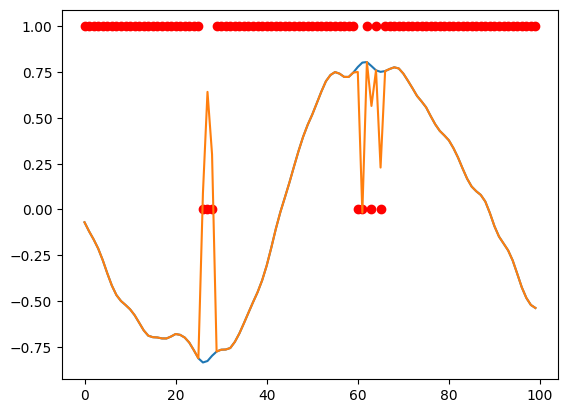

In [17]:
idx = 500
plt.plot(x_train[259].t().cpu().numpy()[idx:idx+100])
# red dots where s[259] = 1
plt.plot(s_train[259].t().cpu().numpy()[idx:idx+100], 'ro')
plt.plot(x_impute.t().cpu().detach().numpy()[idx:idx+100])

In [15]:
x_impute = model.impute(x_train[259].view(1,1024).to(device), s_train[259].view(1, 1024).to(device))